<h1 style="color:rgb(0,120,170)">Assignment 6: Logistic Regression</h1>

<h2 style="color:rgb(0,120,170)">Copyright and Fair Use</h2>

This material, no matter whether in printed or electronic form,
may be used for personal and non-commercial educational use
only. Any reproduction of this material, no matter whether as a
whole or in parts, no matter whether in printed or in electronic
form, requires explicit prior acceptance of the authors.

<h2 style="color:rgb(0,120,170)">Automatic Testing Guidelines</h2>

Automatic unittesting requires you to submit a notebook which contains strictly defined objects.
Strictness of definition consists of unified shapes, dtypes, variable names and more.

Within the notebook, we provide detailed instruction which you should follow in order to maximise your final grade.

**Name your notebook properly**, follow the pattern in the template name:

**Assignment_N_NameSurname_matrnumber**
<ol>
    <li>N - number of assignment</li>
    <li>NameSurname - your full name where every part of the name starts with a capital letter, no spaces</li>
    <li>matrnumber - you student number on ID card (without k, potenitially with a leading zero)</li>
</ol>

Don't add any cells but use the ones provided by us. You may notice that all cells are tagged such that the unittest routine can recognise them. Before you sumbit your solution, make sure every cell has its (correct) tag!

You can implement helper functions where needed unless you put them in the same cell they are actually called. Always make sure that implemented functions have the correct output and given variables contain the correct data type. In the descriptions for every function you can find information on what datatype an output should have and you should stick to that in order to minimize conflicts with the unittest. Don't import any other packages than listed in the cell with the "imports" tag.

Questions are usually multiple choice (except the task description says otherwise) and can be answered by changing the given variables to either "True" or "False". "None" is counted as a wrong answer in any case!

**Note:** Never use variables you defined in another cell in your functions directly; always pass them to the function as a parameter. In the unitest, they won't be available either. If you want to make sure that everything is executable for the unittest, try executing cells/functions individually (instead of running the whole notebook).

In [1]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
import matplotlib
import matplotlib.pyplot as plt
from typing import Tuple

# set the seed for reproducability to 44
RSEED = 44
np.random.seed(RSEED)

<h2 style="color:rgb(210,90,80)">Task 1:</h2>

The goal of this exercise is to implement logistic regression from scratch using only numpy - do not import any new packages! 

Start with the following tasks:

1. Implement the formula for the gradient computed in the lecture. In particular you should implement a function 
`logistic_gradient(w, x, y)` that takes a parameter vector
$\mathbf{w}$, a data matrix $\mathbf{X}$ and a label vector
$\mathbf{y}$ and returns the gradient $\frac{\partial L}{\partial
\mathbf{w}}$, where $L$ is the negative log-likelihood for the Bernoulli distribution, i.e. the cross-entropy loss.

2. Implement a function `cost(w, x, y)`, that takes the same parameters but returns the cross-entropy loss.

3. Test whether the gradient calculated by `logistic_gradient(w, x, y)` is correct via Gradient Checking. To do so, implement
a function `numerical_gradient(w, x, y, eps_list)` that takes the same parameters
as `logistic_gradient` and an additional parameter `eps_list` , which calculates the gradient numerically via the central difference quotient, taking a list of values of $\epsilon$ as input and returns a list of the same length as `eps_list`, containing the computed gradients for each $\epsilon$.
4. Implement the function `generate_random(nr_samples, nr_features)` that generates a random data matrix consisting of 5 data points with 10 features drawn from a standard normal distribution as well as corresponding random binary labels and a random weight vector, whose entries again stem from the standard normal distribution.  Hint: to generate the distributions use `np.random.normal` and `np.random.randint`.

5. Implement the function `comparison(grad_a,grad_n)` that takes the analytical and the numerical gradient, as inputs and checks whether or not the two vectors deviate more than $\varepsilon_\textrm{tol} = 10^{-7}$ (absolute tolerance) from each other and answer the questions.


<h3 style="color:rgb(210,90,80)">Code 1.1 (5 points):</h3>

In [2]:
def logistic_gradient(w:np.ndarray, x:np.ndarray, y:np.ndarray)->np.ndarray:
    """Function that computes the logistic gradient via the cross-entropy loss.

    Parameters
    ----------
    w : np.ndarray
        weights 
    x : np.ndarray
        data matrix
    y : np.ndarray
        data labels

    Returns
    -------
    np.ndarray
        gradient vector
    """
    #Your code goes here ↓↓↓
    gradient = np.ndarray(shape=np.shape(w))

    for j in range(len(w)):
        for i in range(len(y)):
            sigma_i = 1 / (1 + np.exp(-(np.dot(w, x[i]))))
            gradient[j] += (sigma_i - y[i]) * x[i][j]

    return gradient

<h3 style="color:rgb(210,90,80)">Code 1.2 (5 points):</h3>

In [3]:
def cost(w:np.ndarray, x:np.ndarray, y:np.ndarray)->float:
    """Function that computes the cross-entropy loss
    
    Parameters
    ----------
    w : np.ndarray
        weights
    x : np.ndarray
        data matrix
    y : np.ndarray
        data labels

    Returns
    -------
    float
        cross-entropy loss
    """
    #Your code goes here ↓↓↓
    loss = 0

    for i in range(len(y)):
        sigma = 1 / (1 + np.exp(-(np.dot(w, x[i]))))
        loss += y[i] * np.log(sigma) + (1 - y[i]) * np.log(1 - sigma)

    return -loss

<h3 style="color:rgb(210,90,80)">Code 1.3 (10 points):</h3>

In [4]:
def numerical_gradient(w:np.ndarray, x:np.ndarray, y:np.ndarray, eps_list:list, cost_function: callable)-> list:
    """Function that computes the numerical gradient for each epsilon in eps_list.
    Hint: Use the previously implemented cost function, it is given as input to this function, 
    make sure to call it with the correct name (cost_function(...), not cost(...))!

    Parameters
    ----------
    w : np.ndarray
        weights
    x : np.ndarray
        data matrix
    y : np.ndarray
        data labels
    eps : list
        list of floats; the epsilon values for difference quotient calculation
    cost_function: callable
        function that calculates the cross-entropy loss, implemented by you

    Returns
    -------
    list
        list of same length as eps_list containing the np.ndarrays from the computed gradients for each epsilon in eps_list
    """    
    #Your code goes here ↓↓↓
    dw_list = []
    # Unit 5;p. 41
    for idx, eps in enumerate(eps_list):
        dw_list.append(np.zeros(shape=np.shape(w)))
        for i in range(len(w)):
            # p. 41
            e_i = np.zeros(len(w))
            e_i[i] = 1
            dw_list[idx][i] = (cost_function(w + eps * e_i, x, y) - cost_function(w - eps * e_i, x, y))/(2*eps)

    return dw_list

<h3 style="color:rgb(210,90,80)">Code 1.4 (10 points):</h3>

In [5]:
def generate_random(nr_samples:int, nr_features:int, seed = RSEED)-> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    """Function that generates a random matrix X and the random vectors y and weights according to input specifications.
    Hint: to generate the distributions use numpy's np.random.<...> functions.

    Parameters
    ----------
    nr_samples : int,
        number of samples to generate
    nr_features : int,
        number of features of each sample
    seed: int, optional
        seed for np.random, dont change it!
    Returns
    -------
    tuple(np.ndarray,np.ndarray,np.ndarray)
        returns randomly generated data matrices X,y and w.
    """
    # don't change the seed!
    np.random.seed(seed)

    #Your code goes here ↓↓↓
    X_random = np.random.normal(size=(nr_samples, nr_features))
    y_random = np.random.randint(size=(nr_samples), low=0, high=2)
    w_random = np.random.normal(size=(nr_features))

    return (X_random, y_random, w_random)

<h3 style="color:rgb(210,90,80)">Code and Questions 1.5 (4+6 points):</h3>

In [6]:
def comparison(grad_a:np.ndarray,grad_n:np.ndarray) -> bool:
    """Function that compares two arrays, in our case the numerical and analytical gradients.
    Hint: use absolute tolerance, with an error tolerance of 1e-7.

    Parameters
    ----------
    grad_a : np.ndarray
        the analytical gradient
    grad_n : np.ndarray
        the numberical gradient
  
    Returns
    -------
    bool
        True, if arrays are close, according to our specifications, False if not. 
    """
    
    #Your code goes here ↓↓↓    
    close = np.all(np.abs(grad_a - grad_n) <= 1e-7)
    
    return bool(close)

In [7]:
#Nothing to do here, if you did everything correctly, you can just run this code and should see the correct results

n = 5       #number of samples
d = 10      #number of features
eps_list = [1e-1,1e-4,1e-11]     # epsilon values to test
X_random, y_random, w_random = generate_random(n,10,RSEED)
analytical_gradient = logistic_gradient(w_random,X_random,y_random)
num_gradients = numerical_gradient(w_random,X_random,y_random,eps_list,cost)
comparison_results=[]
for grad in num_gradients:
    comparison_results.append(comparison(analytical_gradient, grad))
# Check outputs
assert len(comparison_results) == len(eps_list), "List with comparison results should be the same length as there are epsilon values."
assert isinstance(comparison_results[0],bool), f"Comparison results should be list of booleans."
print("Your randomly generated data:\n")
print("X =",X_random,"\n")
print("y =",y_random,"\n")
print("w = ",w_random,"\n")
print("Logistic gradient:\n",analytical_gradient,"\n")
for i,res in enumerate(comparison_results):
    eps_ = eps_list[i]
    print(f"Numerical gradient {i} with epsilon = {eps_}:\n", num_gradients[i], "\n")
    print("    Vectors within absolute tolerance of 10^-7: ",res, "\n")

Your randomly generated data:

X = [[-0.75061472  1.31635732  1.24614003 -1.60491574 -1.46814368 -1.71507046
   1.85878369  0.08758798 -0.0523222   0.55547164]
 [-0.96340369 -0.18032147 -1.18340916  0.60544592 -0.95165055  0.36085606
   1.06061026 -0.11715218  0.82566485 -1.20981355]
 [-1.19050362  0.21987182 -0.21291913 -1.41149914 -0.48298102  1.20176208
  -0.70580303  0.02518135 -0.39112815  0.19313912]
 [ 0.34929093  0.59118838  0.52040987  0.82522239  0.42620351  0.19564003
  -0.51411218 -3.07368882 -0.39515907 -0.79539918]
 [-0.70320151 -1.73739268  0.75080826 -1.86395314  0.41851098 -0.23533384
   0.43210717  0.87029193  2.00862219  1.37177091]] 

y = [1 1 0 1 0] 

w =  [-0.78250832 -0.68105798  0.76098988  0.62483292 -0.45678902 -0.33331661
  0.55805765  1.39253236  0.44025472 -1.24948056] 

Logistic gradient:
 [-0.99891843 -2.25379004 -0.13244644 -2.38498447  0.17958543  0.23018978
  0.26027996  3.72772198  1.95281213  1.91449719] 

Numerical gradient 0 with epsilon = 0.1:
 [-

***Fill in your results from the comparison of the computed gradients for each of the 3 epsilons and answer the questions below:***


Q1: Following the results from your comparison function, if at all, why do you think is the right choice of $\epsilon$ crucial, for computing adequate approximations with the numerical gradient function?

a15_) The choice does not matter, as long as epsilon is in (0,1) the function will give a satisfying solution, according to our tolerance criterion.<br>
b15_) Very large values for $\epsilon$, e.g. $\epsilon=0.1$, lead to a divergence of the gradient as the denominator approaches zero. <br>
c15_) Very small values for $\epsilon$, e.g. $\epsilon \leq \text{1e-11}$, can result in calculation errors, this could be due to issues with numerical precision, as both values in the numerator as well as in the denominator are very small.<br>

In [16]:
# examples for you
example_of_true_variable = True
example_of_false_variable = False

# your answers go here ↓↓↓
# comparison results for eps_list(eps_0_,eps_1_,eps_2_)

eps_0_ = False
eps_1_ = True
eps_2_ = False

# Q1

a15_ = False
b15_ = False
c15_ = None


Q2: Did you notice that we left out the bias term in our implementation of the logistic regression? (In the lecture Unit 5, Slide 45/47 shows the logistic unit with bias.) The bias $b$ represents the log-odds of the probability that the dependent variable takes on the value of 1 when all independent variables are set to zero.

Why was it okay to not use a bias for our data? 

d15_) The bias term cancels out when calculating the derivative of the loss-function, because it does not depend on $\mathbf{X}$.<br>
e15_) The bias is only relevant when all independent variables are exactly 0, which never actually happens in real data.<br>
f15_) The data follows a standard normal distribution, hence a bias of 0 leads to the correct predictions.<br>

To answer the question, assign "True" or "False" boolean values to variables in the next cell. A non-correctly answered question yields 0 points and no answer (i.e. answer “None”) also gives 0 points for the question. There can be 1, more than 1, or no correct answer(s).<br>
<b>Note:</b> Do not reuse these variable names. They are used for testing.

In [29]:
# examples for you
example_of_true_variable = True
example_of_false_variable = False

# your answers go here ↓↓↓
# Q2

d15_ = True
e15_ = False
f15_ = None

Next we intend to apply logistic regression on a real data set.

6. Implement a function `fitLogRegModel(...)` that uses Logistic Regression with Gradient Descent to train classifiers on the training set. Use randomly initialized weights, drawn from a uniform distribution between $-1$ and $1$, a default learning rate $\eta$ (eta) of $10^{-4}$ and a maximum number of iterations of $1e5$. Furthermore the algorithm should stop either if the difference between the loss of the last iteration step and the current loss is less than the `stopping_criterion=1e-5` or the maximum of allowed iterations (`max_iter=1e5`) is reached. Store all the losses in a list to have some insights in the learning procedure later on. Also print the losses in $1000$ step intervals (also at step 0!). The function should return the model weights and the list containing all the losses.
7. Furthermore, implement a function `predictLogReg(w, x)` that returns the prediction for the given parameter vector $\mathbf{w}$ and feature vector $\mathbf{x}$.

Hint: for intialization use `np.random.uniform`.

<h3 style="color:rgb(208,90,80)">Code 1.6 (20 points)</h3>


In [18]:
def fitLogRegModel(x_train:np.ndarray, y_train:np.ndarray, cost_function: callable, log_grad_function:callable, 
                   eta=1e-4, stopping_criterion = 1e-5, max_iter=1e5,seed=RSEED)->Tuple[np.ndarray,list]:
    """Function that fits a logistic regression model to the given data. 
    Print's the loss every 1000 steps (also in the beginning at step 0).
    Training stops eather if the change of the current loss to the loss of the previous iteration is smaller than the stopping criterion,
    or max_iter is reached. Don't change any of them!
    All losses including the loss before training are stored in a list and returned.
    Hint: make sure to initialize the weights-array from a random uniform distribution with numpy 
    and with the correct dimensions according to x_train.
    Again: Use the function names specified in the input (log_grad_function(...), not logistic_gradient(...))!

    Parameters
    ----------
    x_train : np.ndarray
        training data
    y_train : np.ndarray
        training labels
    cost_function: callable
        function that calculates the cross-entropy loss, implemented by you
    log_grad_function: callable
        function that calculates the logistic gradient, implemented by you
    eta: float
        learning rate and stopping criterion
    max_iter : int, optional
        max iteratioan at which training should stop, by default 100000, don't change it.
    seed : _type_, optional
        seed for numpy, by default RSEED

    Returns
    -------
    Tuple[np.ndarray,list]
        w: array of the final computed weights
        losses: list of floats holding all the losses from training (including the loss before the training)
    """
    np.random.seed(seed)
    # initliaze weights and list of losses
    w = None
    losses = []
    max_iter = int(max_iter)

    # your code go here ↓↓↓

    
    return w,losses

<h3 style="color:rgb(208,90,80)">Code and Questions 1.7 (10 points)</h3>


In [19]:
def predictLogReg(w:np.ndarray, x:np.ndarray)-> np.ndarray:
    """Function that calculates the prediction for one or more new and unseen samples, from the previously trained weights. 
    Do not use any packages for this task except numpy.

    Parameters
    ----------
    w : np.ndarray
        Array of trained weights
    x : np.ndarray
        point(s) to make predictions for

    Returns
    -------
    np.ndarray
        1D array of calculated predictions, size = number of points in x, floats between 0 and 1
    """
    prediction = None

    # your code go here ↓↓↓

    return prediction

Now we fit the logistic regression model from above to the training data and print the parameters for the test data:

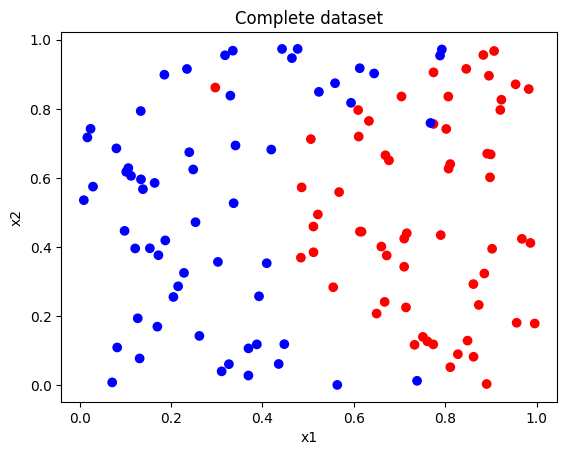

In [20]:
#nothing to do here, just run the cell

# Read data, split into X(features) and y(labels)
Z = np.genfromtxt('DataSet_LR_a.csv', delimiter=',',skip_header=1)
X, y = Z[:,:-1], Z[:,-1]
#prepend ones for intercept
X = np.hstack((np.ones((X.shape[0],1)),X))   

# Plot data distribution
color= ['red' if elem==1 else 'blue' for elem in y ]
plt.scatter(X[:,-2], X[:,-1], c=color)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Complete dataset')
# Split into test and training set
X_train=X[:int(X.shape[0]/2)]
X_test=X[int(X.shape[0]/2):]
y_train=y[:int(len(y)/2)]
y_test=y[int(len(y)/2):]

In [21]:
# try out different values for eta and answer the questions
pred_train = []
pred_test = []
# specify your etas here:
eta_list = [1e-4]
for lr in eta_list:
    w_learned,losses=fitLogRegModel(X_train, y_train,cost,logistic_gradient,eta=lr)
    pred_train.append(predictLogReg(w_learned, X_train)) #as a check
    pred_test.append(predictLogReg(w_learned, X_test))
    print("The learnt weights are: w =",w_learned,"\n")

The learnt weights are: w = None 



***Try out different values of eta in the cell above and answer the question below:***


Q3: Following your experiments with the the learning rate (eta), which of the following statements are correct?

a17_) Learning rates > 0.5 lead to fast convergence and reasonably good predictions on the test data.<br>
b17_) For learning rates smaller than 1e-6 the algorithm does not converge before max_iter is reached. <br>
c17_) When inspecting the plot for the default learning rate 1e-4, we see that also the outliers are classified correctly.<br>
d17_) No matter what learning rate we choose from (0,1), if the algorithm converges, the resulting weights are always the same (within a small tolerance of $\sim|0.1|$)<br>
e17_) If we trained the classifier for a very long time, with the optimal learning rate, the resulting model would separate the training data perfectly (accuracy=1), but it would perform much worse on the test data (overfitting).<br>

***For some questions you may want to plot and inspect the classifier results with the plotting function below the questions.***


In [22]:
# examples for you
example_of_true_variable = True
example_of_false_variable = False

# your answers go here ↓↓↓
# Q3

a17_ = None
b17_ = None
c17_ = None
d17_ = None
e17_ = None


TypeError: 'NoneType' object is not iterable

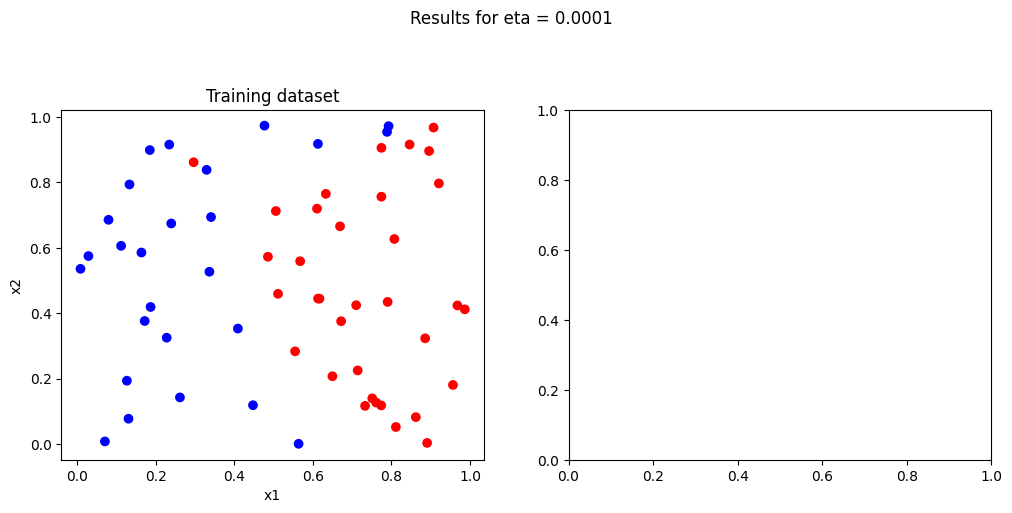

In [23]:
# Nothing to do here
# Plot training and test dataset
# Plot predictions for training and test dataset
for i,_ in enumerate(pred_train):
    fig = plt.figure(figsize = (12,10))
    fig.suptitle(f"Results for eta = {eta_list[i]}")
    plt.subplot(2, 2, 1)
    color= ['red' if elem>0.5 else 'blue' for elem in y_train ]
    plt.scatter(X_train[:,-2], X_train[:,-1], c=color,label='the data')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Training dataset')

    plt.subplot(2, 2, 2)
    color= ['red' if elem>0.5 else 'blue' for elem in pred_train[i] ]
    plt.scatter(X_train[:,-2], X_train[:,-1], c=color,label='the data')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Training dataset - predictions')

    plt.subplot(2, 2, 3)
    color= ['red' if elem>0.5 else 'blue' for elem in y_test ]
    plt.scatter(X_test[:,-2], X_test[:,-1], c=color,label='the data')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Test dataset')

    plt.subplot(2, 2, 4)
    color= ['red' if elem>0.5 else 'blue' for elem in pred_test[i] ]
    plt.scatter(X_test[:,-2], X_test[:,-1], c=color,label='the data')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Test dataset - predictions')


In the following cell the data set `DataSet_LR_a.csv` is loaded and split into a training set and a test set ($50\,\%$ each). Now you should:
* Classify samples as class `1` if the Logistic Regression returns values $\geq 0.5$ and `0` otherwise. Calculate  the entries for a confusion matrix and from these values the Accuracy and Balanced Accuracy in the function `calc_acc(prediction, true_values, threshold)` and apply it on the training and on the test sets.
* Provide ROC curves of the classifiers on the test samples and compute the corresponding AUC. Hint: the functions `roc_curve` and `auc` from `sklearn.metrics` might be useful. Make sure to store the calculated value for the AUC in the variable `rocAUC` - this is important for the unit-test.

<h3 style="color:rgb(208,90,80)">Code 1.8 (15 points)</h3>


In [24]:
def calc_acc(prediction:np.ndarray, true_values:np.ndarray, threshold = 0.5)-> Tuple[float,float,float,float,float,float,float,float]:
    """Function that makes predictions (0 or 1), according to the output of your logistic regression function and the given treshold, 
    and then calculates the accuracy, as well as the balanced accuracy of the predictions vs. true labels.
    Again, only us numpy for this task.
    Parameters
    ----------
    prediction : np.ndarray
        label predictions
    true_values : np.ndarray
        true labels
    threshold : float, optional
        threshold for label decision, by default 0.5

    Returns
    -------
    Tuple[float,float,float,float,float,float,float,float]
        Returns the following, in percentages between 0 and 1:
                pos, float, positive samples 
                neg, float, negative samples 
                tp, float, true positive samples 
                tn, float, true negative samples 
                fp, float, false positive samples 
                fn, float, false negative samples 
                acc, float, accuracy
                balanced_acc, float, balanced accuracy
    """    
    pos = None
    neg = None
    tp = None 
    tn = None 
    fp = None 
    fn = None 
    acc = None 
    balanced_acc = None 
    
    # your code go here ↓↓↓
    
    return pos, neg, tp, tn, fp, fn, acc, balanced_acc


In [25]:
# Calculate accuracy and balanced accuracy for test set

w_learned,losses=fitLogRegModel(X_train, y_train,cost,logistic_gradient,eta=1e-4)
pred_train = predictLogReg(w_learned, X_train)
pred_test = predictLogReg(w_learned, X_test)

result_train = calc_acc(pred_train, y_train)
result_test = calc_acc(pred_test, y_test)
print("\nAccuracy on training data:", result_train[-2])
print("Balanced accuracy on training data:",result_train[-1])
print("Accuracy on test data:",result_test[-2])
print("Balanced accuracy on test data:",result_test[-1])


Accuracy on training data: None
Balanced accuracy on training data: None
Accuracy on test data: None
Balanced accuracy on test data: None


<h3 style="color:rgb(208,90,80)">Code 1.9 (15 points)</h3>


In [26]:
## Solution begin
def roc_auc(y_test:np.ndarray,y_pred:np.ndarray)-> Tuple[plt.figure,float]:
    """Function that calculates the ROC and returns the corresponding AUC of the input predictions vs the true labels,
    as a value and also plots the ROC curve and returns the figure.
    You are only allowed to use the imported sklearn functions.
    Hint: Make sure to return the correct figure (don't use plt.fig() again in your code, or plt.subplots())
    
    Parameters
    ----------
    y_test : np.ndarray
        True labels of test data
    y_pred : np.ndarray
        Predictions of test labels

    Returns
    -------
    Tuple[plt.figure,float]
        figure: matplotlib figure, containing the plot of the ROC curve
        rocAUC: float, value for the area under the computed ROC curve
    """
    fig = plt.figure()
    rocAUC = None
    
    # your code go here ↓↓↓

    return fig, rocAUC


In [27]:
fig, roc_AUC = roc_auc(y_test,pred_test)
assert type(fig) == matplotlib.figure.Figure, "Function does not return Figure."
print("Computed AUC =",roc_AUC)

Computed AUC = None


<Figure size 640x480 with 0 Axes>

In [28]:
# Implementation check:
## Executability does not guarantee correctness of your solutions!
X = np.asarray([[0,1],[1,0]])
y = np.asarray([0,1])
w = np.asarray([1,1])
analytical_gradient = logistic_gradient(w,X,y)
num_gradient = numerical_gradient(w,X,y,[1e-4],cost)
comparison(analytical_gradient, num_gradient)
fitLogRegModel(X, y,cost,logistic_gradient,eta=0.0)
predictLogReg(w,X)
for i,a in enumerate([eps_0_,eps_1_,eps_2_,a15_,b15_,c15_,d15_ ,e15_,f15_, a17_,b17_,c17_,d17_,e17_]):
    assert a is not None, (f"Question(s) not answered! ({i}th in list)")
calc_acc(y,np.asarray([1,0]),0.5)
roc_auc(y,np.asarray([1,1]))
print("Executable")

AssertionError: Question(s) not answered! (5th in list)